# `example2_multiple_linear_regression`


#

# California Housing 데이터셋

housing.data: (20640, 8) - 특성 데이터

housing.target: (20640,) - 주택 가격 (단위: $100,000)

housing.feature_names: 8개 특성의 이름

housing.DESCR: 데이터셋 상세 설명


# # California Housing Feature



3.1 MedInc (Median Income)

의미: 해당 블록의 중위 소득

단위: $10,000 단위

범위: 보통 0.5 ~ 15.0

해석: 값이 5.0이면 중위소득 $50,000

중요도: 주택 가격에 가장 큰 영향을 미치는 변수


3.2 HouseAge (House Age)

의미: 해당 블록 주택들의 중위 연령

단위: 년(years)

범위: 1 ~ 52년

특징: 52년으로 상한이 제한됨 (1990년 기준 1938년 이전 주택)

영향: 너무 오래되거나 너무 새로운 주택 모두 가격에 영향


3.3 AveRooms (Average Rooms)

의미: 해당 블록 가구당 평균 방 수

단위: 개수

범위: 보통 3 ~ 15개

계산: 총 방 수 / 가구 수

해석: 값이 클수록 넓은 주택


3.4 AveBedrms (Average Bedrooms)

의미: 해당 블록 가구당 평균 침실 수

단위: 개수

범위: 보통 0.8 ~ 5.0개

특징: AveRooms보다 작은 값

주의: 일부 이상치 존재 (비정상적으로 높은 값)


3.5 Population (Population)

의미: 해당 블록의 총 인구 수

단위: 명

범위: 3 ~ 35,682명

분포: 오른쪽으로 치우친 분포 (대부분 낮은 값)

영향: 인구 밀도와 주택 수요에 관련


3.6 AveOccup (Average Occupancy)

의미: 가구당 평균 거주자 수

단위: 명/가구

범위: 보통 1 ~ 10명

계산: 총 인구 / 가구 수

해석: 값이 클수록 과밀 거주


3.7 Latitude (위도)

의미: 해당 블록의 위도

단위: 도(degrees)

범위: 32.54 ~ 41.95 (캘리포니아 남북 범위)

특징: 남쪽(낮은 값)이 북쪽보다 일반적으로 비쌈

지역: 32.x대는 샌디에이고, 37.x대는 샌프란시스코


3.8 Longitude (경도)

의미: 해당 블록의 경도

단위: 도(degrees)

범위: -124.35 ~ -114.31 (캘리포니아 동서 범위)

특징: 바다에 가까운 지역(서쪽)이 비쌈

지역: -118.x대는 로스앤젤레스, -122.x대는 샌프란시스코



# Code

In [1]:
# Ex 2: Multiple Linear Regression on California Housing


# 1) 라이브러리 불러오기
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 2) 데이터 로드
housing = fetch_california_housing()
X = housing.data       # 여러 특성
y = housing.target     # 주택 가격 (단위: 100,000 달러)

In [2]:

# 기본 정보
print("데이터 형태:", housing.data.shape)
print("타겟 형태:", housing.target.shape)
print("특성 이름:", housing.feature_names)

데이터 형태: (20640, 8)
타겟 형태: (20640,)
특성 이름: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


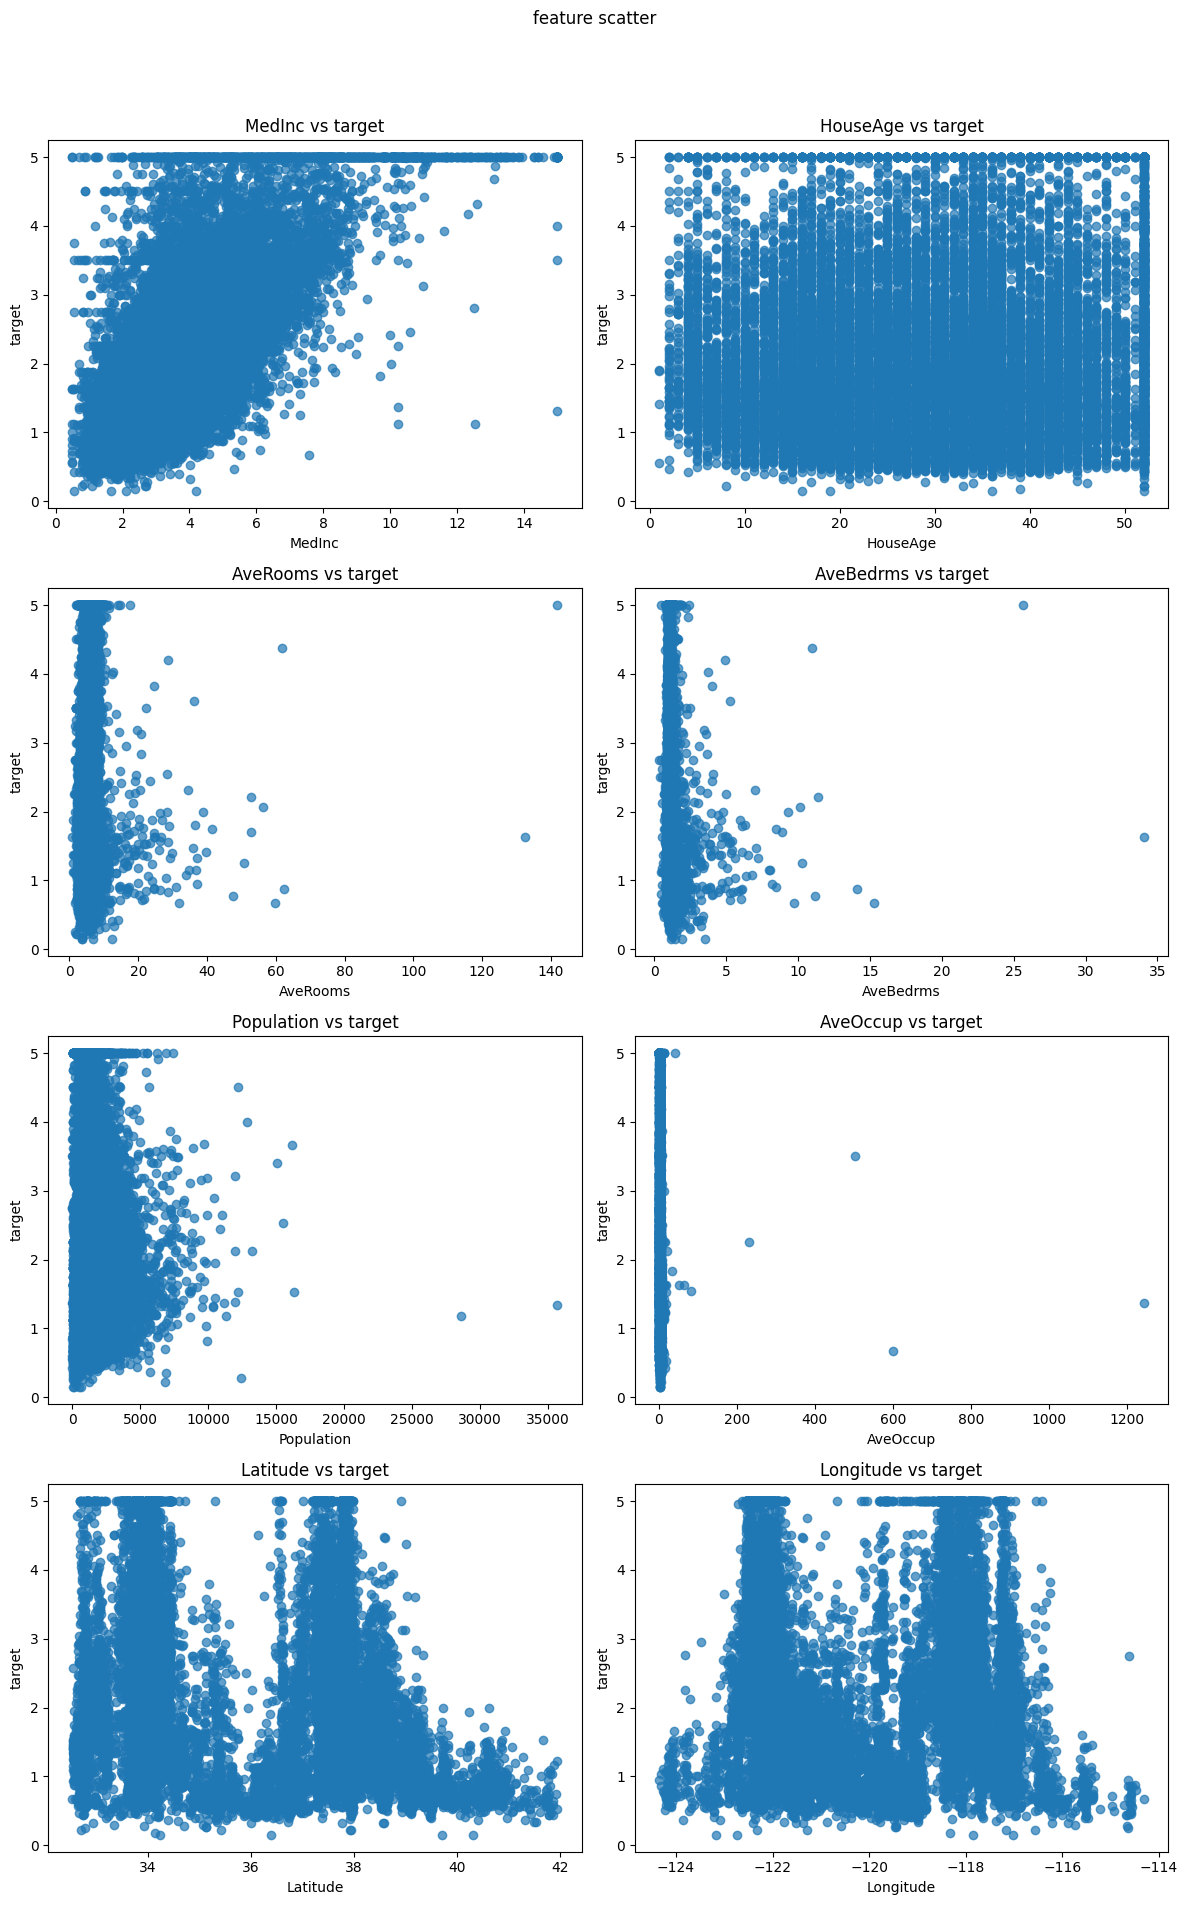

In [11]:
# 4개의 subplot을 위한 figure 생성
df = pd.DataFrame(X, columns=housing.feature_names)
df['target'] = y

fig, axes = plt.subplots(4, 2, figsize=(12, 20))
fig.suptitle('feature scatter')


target = 'target'
for i, feature in enumerate(housing.feature_names):
    row, col = divmod(i, 2)
    axes[row, col].scatter(df[feature], df[target], alpha=0.7)
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel(target)
    axes[row, col].set_title(f'{feature} vs {target}')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  


/var/folders/xn/w4kqb1715fz7h49tp_h7hbmr0000gn/T/ipykernel_24908/2671700116.py:18: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/xn/w4kqb1715fz7h49tp_h7hbmr0000gn/T/ipykernel_24908/2671700116.py:18: UserWarning: Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/xn/w4kqb1715fz7h49tp_h7hbmr0000gn/T/ipykernel_24908/2671700116.py:18: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/kwangsiklee/work/AICamp/mywork/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kwangsiklee/work/AICamp/mywork/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from font(s) DejaVu Sans.
  fig.c

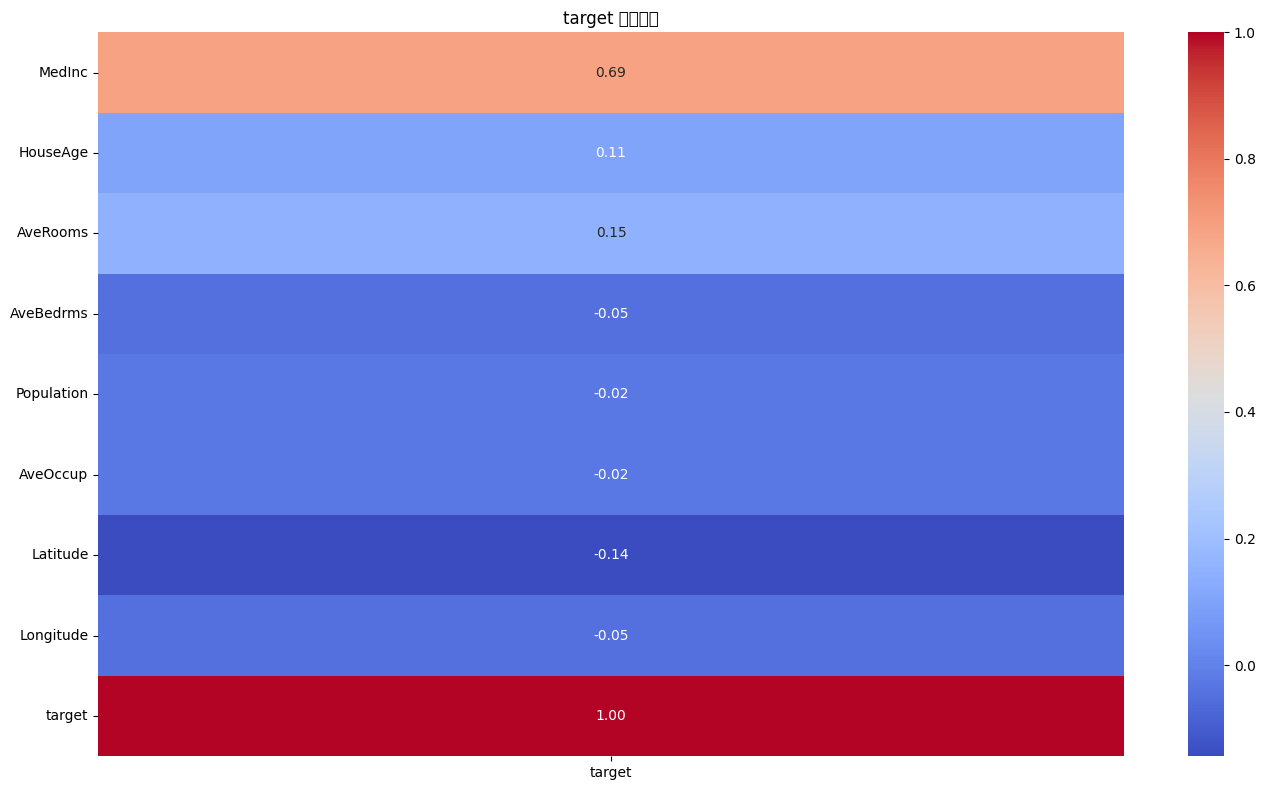

In [ ]:
# 상관관계 분석

import seaborn as sns
import pandas as pd

df1 = pd.DataFrame(X, columns=housing.feature_names)
df1['target'] = y
print(df1.head())

# 상관계수 계산 (숫자형 변수들에 대해서만)
correlation_matrix = df1.corr(numeric_only=True)
# 흡연자여부 상관관계만 추출 (자기 자신 제외)
corr = correlation_matrix[["target"]]


# 히트맵 2개를 나란히 그리기
fig, axes = plt.subplots(1, 1, figsize=(14, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", cbar=True, ax=axes)
axes.set_title("feature 상관관계")
plt.tight_layout()
plt.show()

In [ ]:
# 3) 학습/테스트 분리
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0
)

# 4) 모델 생성 및 학습
lr = LinearRegression()
lr.fit(X_train, y_train)

print("회귀 계수 (Coefficients)")
for name, coef in zip(housing.feature_names, lr.coef_):
    print(f" {name}: {coef:.3f}")
print("절편(intercept):" , lr.intercept_.round(3))

 MedInc: 0.447
 HouseAge: 0.009
 AveRooms: -0.118
 AveBedrms: 0.642
 Population: -0.000
 AveOccup: -0.004
 Latitude: -0.409
 Longitude: -0.423
절편(intercept): -36.012


min pred--1.00070919605065, max pred-7.2843736301848026
MSE: 0.543
RMSE: 0.737
R²: 0.593


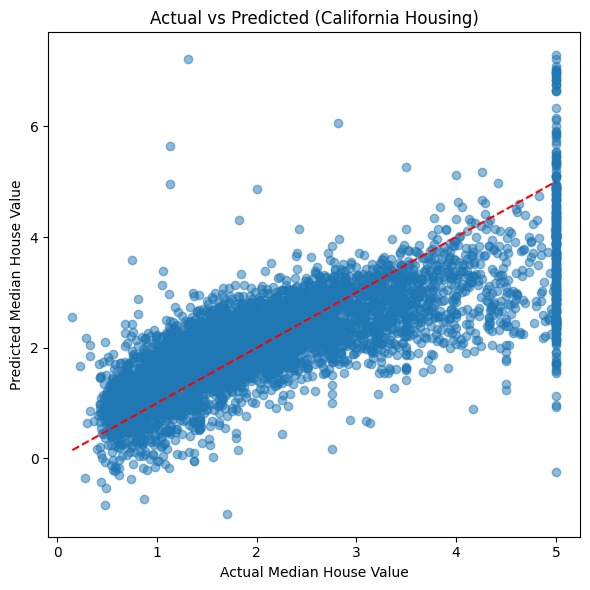

In [13]:

# 5) 예측 및 평가
y_pred = lr.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"min pred-{y_pred.min()}, max pred-{y_pred.max()}")

print(f"MSE: {mean_squared_error(y_test, y_pred):.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R²: {r2:.3f}")

# Plot Actual vs Predicted for Multiple Linear Regression
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.title('Actual vs Predicted (California Housing)')
plt.tight_layout()
plt.show()

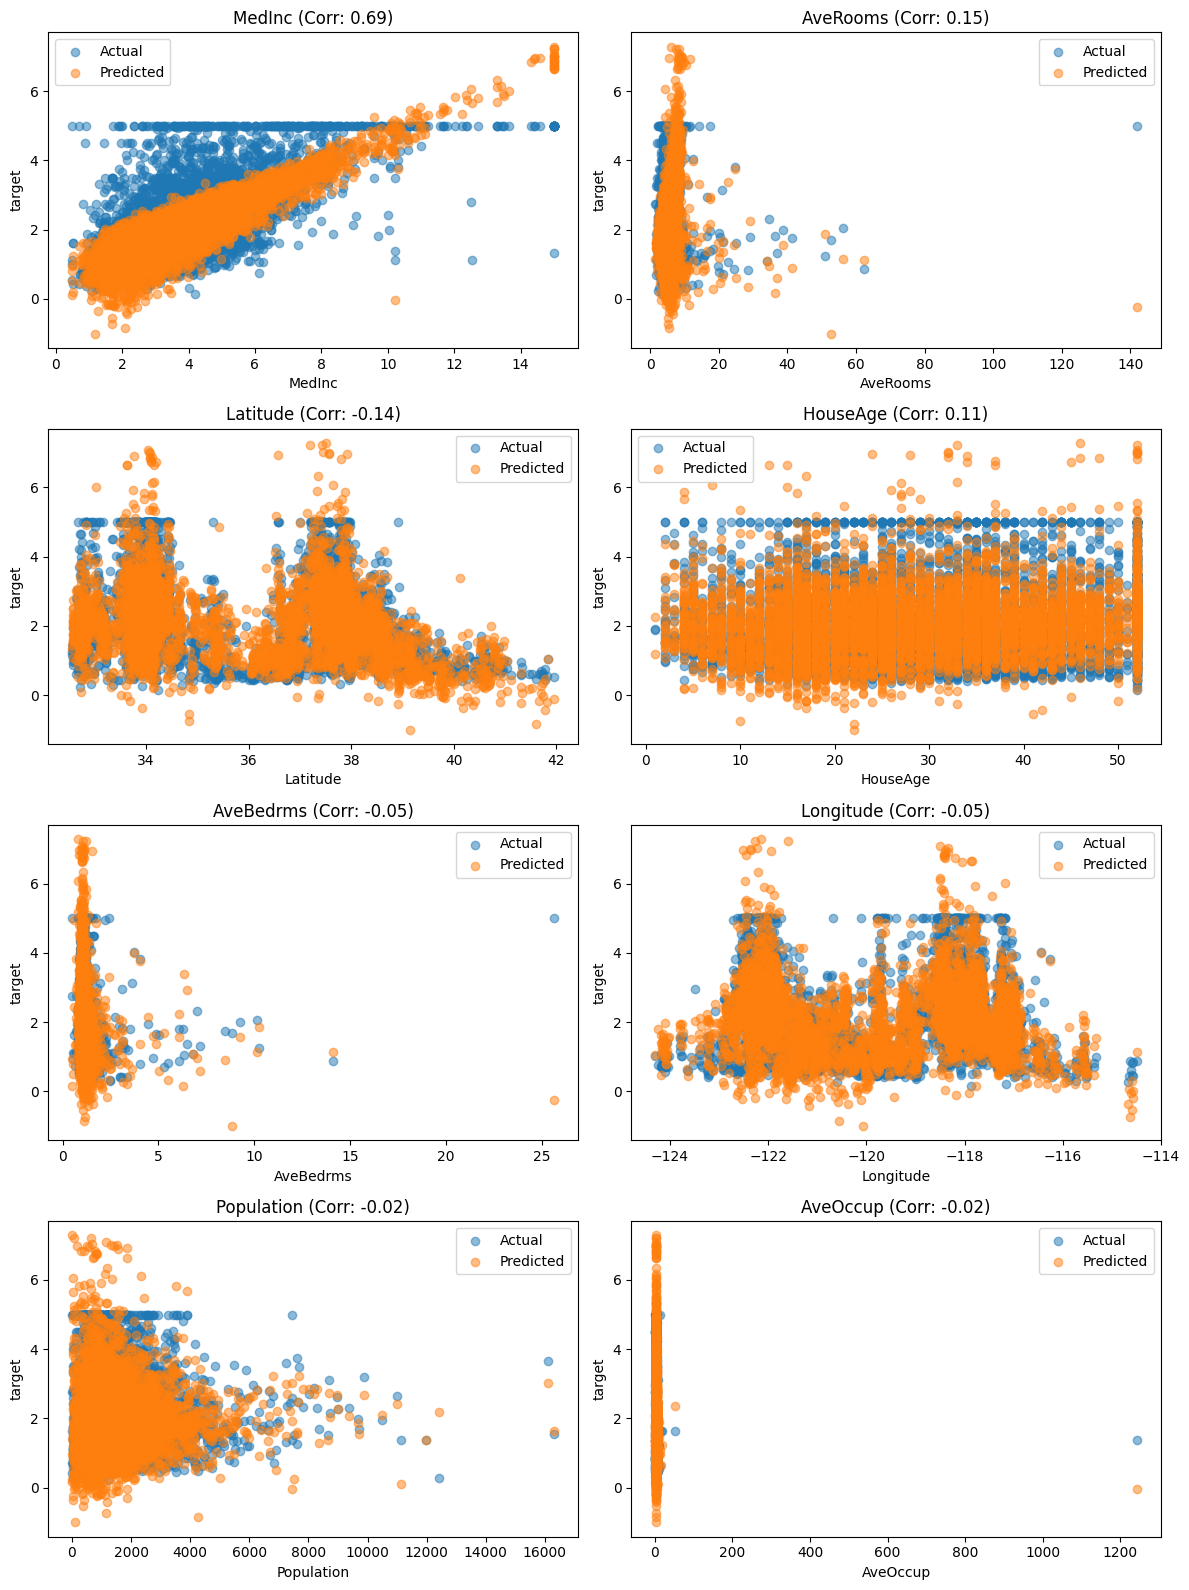

In [ ]:
# 독립변수별 예측, 실제 산점도
corr_matrix = df1.corr(numeric_only=True)
corrs = corr_matrix['target'].abs().drop('target').sort_values(ascending=False)
features_sorted = corrs.index.tolist()

plt.figure(figsize=(12, 16))
for idx, feat in enumerate(features_sorted):
    plt.subplot(4, 2, idx+1)
    feat_idx = housing.feature_names.index(feat)
    plt.scatter(X_test[:, feat_idx], y_test, alpha=0.5, label='Actual')
    plt.scatter(X_test[:, feat_idx], y_pred, alpha=0.5, label='Predicted')
    plt.xlabel(feat)
    plt.ylabel('target')
    plt.title(f"{feat} (Corr: {corr_matrix.loc[feat, 'target']:.2f})")
    plt.legend()
plt.tight_layout()
plt.show()